In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import umap

In [4]:
import json

# Abrir json con las features
with open('../data/utils/feature_extraction.json') as json_file:
    data = json.load(json_file)

In [5]:
data = data[0:18415]
print(np.shape(np.array(data)))

(18415, 384)


In [6]:
labels = np.load("../data/utils/classes.npy", allow_pickle=True)

In [7]:
# Normalizar los datos respecto a la media y la desviación estándar de cada feature
data = np.array(data)
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)

In [8]:
reducer = umap.UMAP()
umap_results = reducer.fit_transform(data)
path_model = "../plots/"

In [9]:
df = pd.read_excel('../data/data.xlsx')
# Solo nos quedamos con categoria hogar
df1 = df[df["Categoria 1"] == 'hogar']
# Contar Categoria 2
df1["Categoria 2"].value_counts()
df1["Categoria 2"] = df1["Categoria 2"].fillna(df["Categoria 1"])
labels = df1["Categoria 2"].values

C:\Users\sebag\AppData\Local\Temp\ipykernel_28800\3262944030.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Categoria 2"] = df1["Categoria 2"].fillna(df["Categoria 1"])


In [10]:
import matplotlib.cm as cm

def create_plot(data, labels, model, path_model, plot, classes):
  df = pd.DataFrame(data)
  class_list = []
  for lb in labels: 
    # class_list.append(classes[lb])
    class_list.append(lb)
  colores_personalizados = sns.color_palette("tab20", 15)
  df["clases"] = class_list
  
  custom_palette = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
    "#3c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",
    "#aec7e8", "#ffbb78", "#98df8a", "#ff9896", "#c5b0d5",
    "#c49c94", "#f7b6d2", "#c7c7c7", "#dbdb8d", "#9edae5"
  ]

  
  
  
  fig, ax = plt.subplots()
  fig.set_size_inches(15, 8)
  sns.scatterplot(x = 0, y = 1, hue = "clases", data = df, ax = ax, palette=custom_palette, legend="full", markers=True, s=20)
  # # Scater de matplotlib
  # for i in range(len(classes)):
  #   ax.scatter(df[df["clases"] == i][0], df[df["clases"] == i][1], label=classes[i], s=10)  
  ax.set_title(f"{model}")
  ax.set_xlabel("UMAP 1")
  ax.set_ylabel("UMAP 2")
  # Achicar la leyenda
  ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
  # legend = ax.legend(loc='best', shadow=True, fontsize='x-large')
  plt.savefig(path_model+f"results/{model}.png")
  if plot: plt.show()

e:\Drive-Seba\UChile\10mo semestre\Proyecto de Ciencia de Datos\E-Commerce-Chatbot\.env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Drive-Seba\UChile\10mo semestre\Proyecto de Ciencia de Datos\E-Commerce-Chatbot\.env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Drive-Seba\UChile\10mo semestre\Proyecto de Ciencia de Datos\E-Commerce-Chatbot\.env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Drive-Seba\UChile\10mo semestre\Proyecto

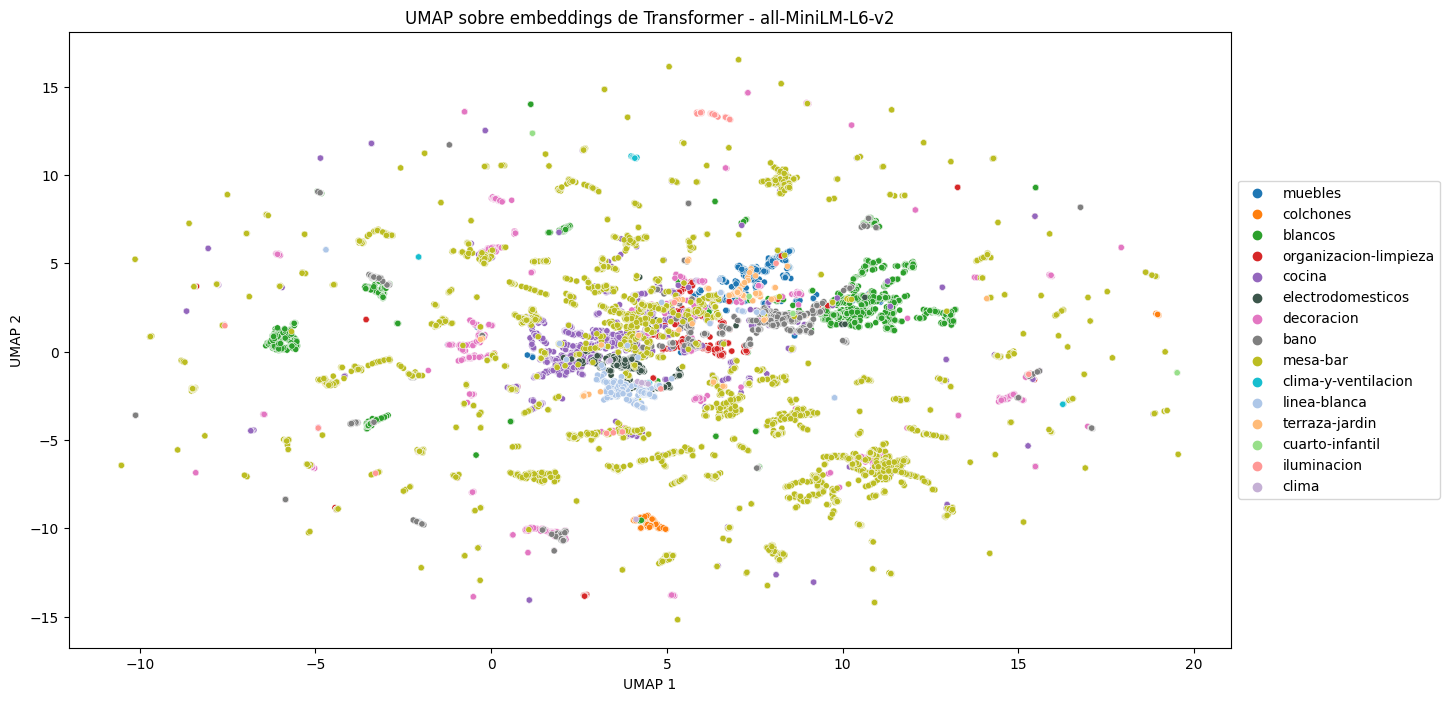

In [11]:
name = "UMAP sobre embeddings de Transformer - all-MiniLM-L6-v2"
create_plot(umap_results, labels, name, path_model, plot = True, classes = np.unique(labels))